In [152]:
import os
import torch
import warnings
import torch.nn as nn
from torch.utils.data import DataLoader
from enumber import *
from MyDataSet import MyDataset
from Transformer_ViT_Train import test
from Eval_tool import db_conversion
from fvcore.nn import FlopCountAnalysis
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import Normalize
from matplotlib.gridspec import GridSpec

warnings.filterwarnings("ignore")

output_list = []
flops_list = []

batch_size = 128
lr = 0.001
momentum = 0.9
num_epochs = 10
img_channels = 2
img_height = 32
img_width = 32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

input_tensor = torch.rand(1, 2, 32, 32)
input_tensor = input_tensor.to(device)

In [123]:
envir = 'indoor'
x_test = MyDataset(dataset_path='../data/DATA_Htestin.mat', img_channels=img_channels, img_height=img_height,
                           img_width=img_width)

In [124]:
data = x_test[0]

In [125]:
data[0].shape

torch.Size([2, 32, 32])

In [126]:
input = data[0]
input.shape

torch.Size([2, 32, 32])

In [127]:
input = input.unsqueeze(0)
input = input.to(device)
input.shape

torch.Size([1, 2, 32, 32])

In [128]:
encoded_dim = 512
file_path = "../model/TNT/TNT_{}_{}.pth".format(envir, encoded_dim)

In [129]:
if os.path.isfile(file_path):
    print("Model exist, try to load model!")
    model = torch.load(file_path)
    model = model.to(device)
    print("Load model successfully!")
else:
    print("model no exist! Check again!")

Model exist, try to load model!
Load model successfully!


In [130]:
output = model(input)

In [131]:
output.shape

torch.Size([1, 2, 32, 32])

In [132]:
input = input.squeeze().to("cpu")
output = output.squeeze().to("cpu")

In [133]:
print(input.shape)
output.shape

torch.Size([2, 32, 32])


torch.Size([2, 32, 32])

In [134]:
real_input = input[0]
imag_input = input[1]
abs_input = real_input**2 + imag_input**2

real_output = output[0]
imag_output = output[1]
abs_output = real_output**2 + imag_output**2

In [135]:
real_input = real_input.unsqueeze(0)
imag_input = imag_input.unsqueeze(0)
abs_input = abs_input.unsqueeze(0)

real_output = real_output.unsqueeze(0)
imag_output = imag_output.unsqueeze(0)
abs_output = abs_output.unsqueeze(0)

normalize = Normalize(mean=[0.5], std=[0.5])
abs_output.shape

torch.Size([1, 32, 32])

In [149]:
real_gray_input = normalize((real_input*255).type(torch.float32)).type(torch.uint8)
imag_gray_input = normalize((imag_input*255).type(torch.float32)).type(torch.uint8)
abs_gray_input = normalize((abs_input*255).type(torch.float32)).type(torch.uint8)

real_gray_output = normalize((real_output*255).type(torch.float32)).type(torch.uint8)
imag_gray_output = normalize((imag_output*255).type(torch.float32)).type(torch.uint8)
abs_gray_output = normalize((abs_output*255).type(torch.float32)).type(torch.uint8)

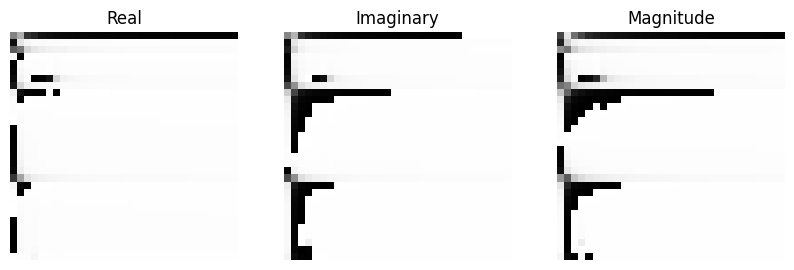

In [150]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].imshow(real_gray_input.squeeze().numpy(), cmap='gray')
axs[0].set_title('Real')
axs[0].axis('off')
axs[1].imshow(imag_gray_input.squeeze().numpy(), cmap='gray')
axs[1].set_title('Imaginary')
axs[1].axis('off')
axs[2].imshow(abs_gray_input.squeeze().numpy(), cmap='gray')
axs[2].set_title('Magnitude')
axs[2].axis('off')
plt.show()

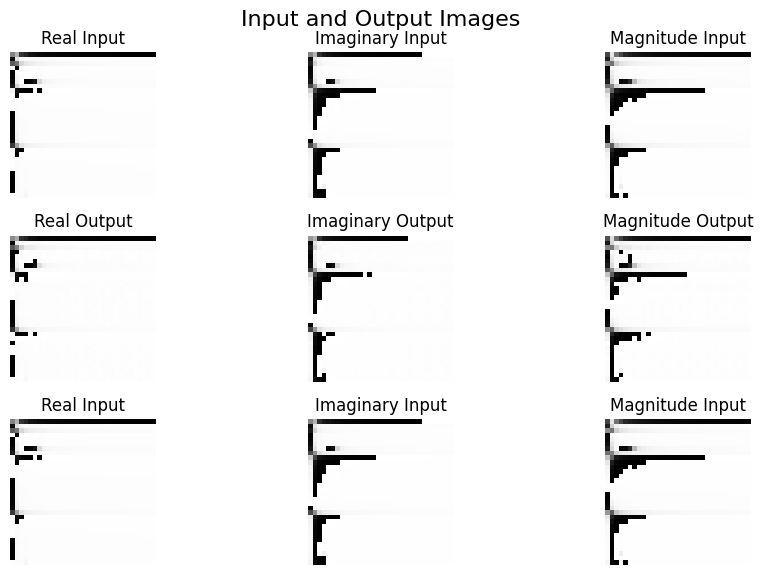

In [159]:
gs = GridSpec(3, 3, figure=plt.figure(figsize=(10, 6)))

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(real_gray_input.squeeze().numpy(), cmap='gray')
ax1.set_title('Real Input')
ax1.axis('off')

ax2 = plt.subplot(gs[0, 1])
ax2.imshow(imag_gray_input.squeeze().numpy(), cmap='gray')
ax2.set_title('Imaginary Input')
ax2.axis('off')

ax3 = plt.subplot(gs[0, 2])
ax3.imshow(abs_gray_input.squeeze().numpy(), cmap='gray')
ax3.set_title('Magnitude Input')
ax3.axis('off')

ax4 = plt.subplot(gs[1, 0])
ax4.imshow(real_gray_output.squeeze().numpy(), cmap='gray')
ax4.set_title('Real Output')
ax4.axis('off')

ax5 = plt.subplot(gs[1, 1])
ax5.imshow(imag_gray_output.squeeze().numpy(), cmap='gray')
ax5.set_title('Imaginary Output')
ax5.axis('off')

ax6 = plt.subplot(gs[1, 2])
ax6.imshow(abs_gray_output.squeeze().numpy(), cmap='gray')
ax6.set_title('Magnitude Output')
ax6.axis('off')

ax7 = plt.subplot(gs[2, 0])
ax7.imshow(real_gray_input.squeeze().numpy(), cmap='gray')
ax7.set_title('Real Input')
ax7.axis('off')

ax8 = plt.subplot(gs[2, 1])
ax8.imshow(imag_gray_input.squeeze().numpy(), cmap='gray')
ax8.set_title('Imaginary Input')
ax8.axis('off')

ax9 = plt.subplot(gs[2, 2])
ax9.imshow(abs_gray_input.squeeze().numpy(), cmap='gray')
ax9.set_title('Magnitude Input')
ax9.axis('off')

plt.suptitle('Input and Output Images', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()